# Numerical solution of protoplanet migration model differential equation (eqn. 34)


Taken from : 'Protoplanet Migration by Nebula Tides' - Ward, 1997

In [1]:
import math
import time
import numpy as np
import scipy as sp
import sympy as smp
from scipy.integrate import quad
import scipy.optimize as optimize
from sympy import *
import matplotlib as mpl
import matplotlib.pyplot as plt

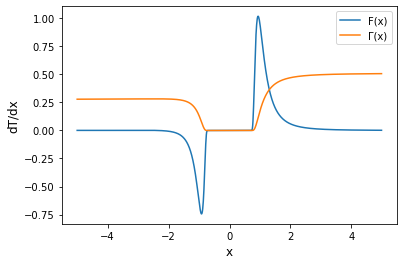

In [2]:
# Torque density F(x) and its integral Γ(x)

f = lambda x: np.piecewise(x, [(x > 2/3), (x < -2/3), (-2/3 < x) & (x < 2/3)], 
                          [lambda x: np.exp(-abs(-1.05/(x - 2/3)))*(0.228/(x - 2/3)**4 + 0.136/(x - 2/3)**3), 
                           lambda x: -1*np.exp(-abs(-1.05/(x + 2/3)))*(0.228/(x + 2/3)**4 + 0.136/(x + 2/3)**3),
                           lambda x: 0])


g = lambda x: np.piecewise(x, [(x > 2/3), (x < -2/3), (-2/3 < x) & (x < 2/3)], 
                          [lambda x: np.exp(-abs(1.05/(x-2/3)))*(0.197*(2+2*abs(1.05/(x-2/3))+(1.05/(x-2/3))**2)+0.117*(1+abs(1.05/(x-2/3)))), 
                           lambda x: np.exp(-abs(1.05/(x+2/3)))*(0.197*(2+2*abs(1.05/(x+2/3))+(1.05/(x+2/3))**2)-0.117*(1+abs(1.05/(x+2/3)))),
                           lambda x: 0])

x_val = np.arange(-5, 5, 0.01)

plt.plot(x_val, f(x_val), label = 'F(x)')
plt.plot(x_val, g(x_val), label = 'Γ(x)')
plt.xlabel('x', fontsize = 12)
plt.ylabel('dT/dx', fontsize = 12)
plt.legend()
plt.show()

In [3]:
# Define constants

h = 0.07
alpha = 10**-5     # viscosity parameter
mu_g = 0.0035
nu = (0.0024**2 * alpha) / (3 * h**3)

v = Symbol('v')

def expansion(mu):
    
    mu_v = 0.0024 * (alpha)**(1/2)                                                       # equation 40
    mu2 = 0.00371 * alpha**(2/3) / 0.63                                                  # auxiliary mass (eqn.43)
    dv = ((-2 * mu_g * mu_v**2) * (1 - np.exp(-0.248 * (mu/mu_v)**2))) / (h**3 * mu)     # equation 41
    
    v_exp = (dv / (1 + (mu/mu2)**3)) - ((3 * nu/2) / (1 + (mu2/mu)**3))                  # equation 44 
    gamma_exp = (-h / (3 * nu)) * (v_exp + (3 * nu) / 2)                                 # definition of gamma from eqn.33
    
    print(f'Velocity from expansion for mass = {i}: {v_exp}')
    print(f'Corresponding gamma: {gamma_exp}')
    print('\n')
    

index = np.arange(-1, 3.2857, 2/7)            
mass = (3 * 10**-6) * 10**index      
mass_arr = np.array(mass/((3 * 10**-6)))    # range of mass to obtain plots
mass_arr2 = mass_arr.astype(float)           
log_mass = np.log10(mass_arr2)              # conversion to log scale


for i in mass[0 : ]:                        # gives velocity and the corresponding gamma from expansion for particular mass   
    v_exp_val = expansion(i)


Velocity from expansion for mass = 3.0000000000000004e-07: -1.516179672970362e-06
Corresponding gamma: 0.5970047560419863


Velocity from expansion for mass = 5.79209318664975e-07: -2.9025732909233716e-06
Corresponding gamma: 1.1749094568588576


Velocity from expansion for mass = 1.118278116094482e-06: -5.2882678496648095e-06
Corresponding gamma: 2.169363039417572


Velocity from expansion for mass = 2.1590570190034557e-06: -7.274748513951505e-06
Corresponding gamma: 2.9974081913190234


Velocity from expansion for mass = 4.168486483119412e-06: -4.536294554271162e-06
Corresponding gamma: 1.8559102820842128


Velocity from expansion for mass = 8.048087385839174e-06: -1.4208771758895266e-06
Corresponding gamma: 0.5572788366858951


Velocity from expansion for mass = 1.553842403769363e-05: -3.4825785177683955e-07
Corresponding gamma: 0.11016789967295006


Velocity from expansion for mass = 3e-05: -1.1290200498621114e-07
Corresponding gamma: 0.01206210312012033


Velocity from expansion f

In [4]:
def j(x, y):
    return x_integ(x) * y_integ(y)

def y_integ(y):
    return beta * f(y) * np.exp(-beta * g(y) - ((-h / (3 * nu)) * (v_ep + (3 * nu) / 2)) * y)

def x_integ(x):
    return f(x) * np.exp(beta * g(x) + ((-h / (3 * nu)) * (v_ep + (3 * nu) / 2)) * x)

def j_integ(x):
    return x_integ(x) * integral_of_f(x)

def integral_of_f(x):
    return quad(y_integ, 20, x)[0]   # ADD(ed) A SMALLER VALUE OF LIMIT HERE LIKE 20


mu = 1.8928 * 10**-5                        # value of mass
beta = (mu**2) / (3 * nu * h**3)

v_ep = -3.80976*10**-7   # value from expansion to compare to (v_input)
print("v input:",v_ep)

result = (-2 * mu * mu_g * 0.248 / h**3) - (2 * mu * mu_g / h**3) * quad(j_integ, -20, 20)[0]  
print("v output:",result)


v input: -3.8097599999999996e-07
v output: -3.809465090036135e-07


In [5]:
print('\n', 'relative error =',abs((result - v_ep) / v_ep))    


 relative error = 7.740906615230129e-05


In [6]:
def func(vinp):    # FUNCTION TO SOLVE THE MAIN DIFFERENTIAL EQUATION 
    
    def j(x, y):
        return x_integ(x) * y_integ(y)

    def y_integ(y):
        return beta * f(y) * np.exp(-beta * g(y) - ((-h / (3 * nu)) * (vinp + (3 * nu) / 2)) * y)

    def x_integ(x):
        return f(x) * np.exp(beta * g(x) + ((-h / (3 * nu)) * (vinp + (3 * nu) / 2)) * x)

    def j_integ(x):
        return x_integ(x) * integral_of_f(x)

    def integral_of_f(x):
        return quad(y_integ, 20, x)[0]   


    mu = 1.8928e-5                        
    beta = (mu**2) / (3 * nu * h**3)
    
    v_output = vinp - ((-2 * mu * mu_g * 0.248 / h**3) - (2 * mu * mu_g / h**3) * quad(j_integ, -20, 20)[0])   

    return v_output

In [7]:
func(-3.8*10**-7)

1.466547249201142e-07

In [8]:
# BISECTION ALGORITHM FROM SCRATCH!

# To acheive similar level of accuracy as optimize.bisect, tolerance should be set very small.

start = time.time()

def bisection(v1, v2, tol):
    
    fa = v1
    fb = v2    
    i = 0
    
    while (np.abs(fa - fb) >= tol):
        
        fc = (fa + fb) / 2.0
        product = func(fa) * func(fc)
        
        if product > tol:
            fa = fc
        else:
            if product < tol:  
                fb = fc
                
        i = i + 1
        print(i," ",fc," ",abs(fa - fb))    # iteration, root(so far), achieved tolerance 

    return fc

ans = bisection(-3.5e-07, -4e-07, 1e-16)

end = time.time()
print('\n',"answer:", ans)
print('\n', "time taken:", (end - start) / 60,"min")

1   -3.75e-07   2.4999999999999972e-08
2   -3.875e-07   1.2499999999999986e-08
3   -3.8125e-07   6.249999999999993e-09
4   -3.78125e-07   3.125000000000023e-09
5   -3.796875e-07   1.562499999999985e-09
6   -3.8046875000000004e-07   7.81249999999966e-10
7   -3.8085937500000005e-07   3.9062499999995656e-10
8   -3.8105468750000005e-07   1.9531250000000475e-10
9   -3.8095703125000005e-07   9.765625000000237e-11
10   -3.809082031250001e-07   4.882812499997472e-11
11   -3.8093261718750003e-07   2.441406249996089e-11
12   -3.8092041015625005e-07   1.2207031249980444e-11
13   -3.8091430664062504e-07   6.1035156249637524e-12
14   -3.8091125488281256e-07   3.0517578124818762e-12
15   -3.809097290039063e-07   1.5258789062409381e-12
16   -3.809104919433594e-07   7.629394530939993e-13
17   -3.8091011047363284e-07   3.8146972652052986e-13
18   -3.8090991973876955e-07   1.9073486323379515e-13
19   -3.8090982437133796e-07   9.536743164336735e-14
20   -3.809097766876221e-07   4.76837157952139e-14
21   

In [18]:
# Bisection algorithm implemented by optimize.bisect

start = time.time()

answer = optimize.bisect(func, -3.5e-7, -4e-7)

print("answer:",answer)
end = time.time()
print('\n',"time taken:",(end-start)/60,"min")

answer: -3.809768676757813e-07

 time taken: 3.6617147564888 min


In [9]:
# VERIFICATION OF ALGORITHM (to verify the triple velocity existence in alpha = 10^-5 plot !)

strt = time.time()

vval = np.logspace(-3e-8,  -7.8e-5, 100)    # range of values of v_input    # used logspace now (earlier linspace)
 
vout = []
for i in range(len(vval)):
    vout.append(func(vval[i]))
    print(i," ",vval[i]," ",func(vval[i]))

plt.plot(vval, vout)
plt.axhline(y = 0.0, color = "black", linestyle = '--', linewidth = 0.5)    # x-axis line
plt.xlabel(r'$v_{input}$', fontsize = 14)
plt.ylabel(r'$v_{s} - RHS$', fontsize = 14)
plt.show()    
    
end = time.time()
print('\n',"time:",(end-strt)/60,"min")

<ipython-input-6-c59e30a7cea5>:7: RuntimeWarning: overflow encountered in exp
  return beta * f(y) * np.exp(-beta * g(y) - ((-h / (3 * nu)) * (vinp + (3 * nu) / 2)) * y)
<ipython-input-6-c59e30a7cea5>:7: RuntimeWarning: invalid value encountered in double_scalars
  return beta * f(y) * np.exp(-beta * g(y) - ((-h / (3 * nu)) * (vinp + (3 * nu) / 2)) * y)
<ipython-input-6-c59e30a7cea5>:16: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(y_integ, 20, x)[0]
<ipython-input-6-c59e30a7cea5>:10: RuntimeWarning: overflow encountered in exp
  return f(x) * np.exp(beta * g(x) + ((-h / (3 * nu)) * (vinp + (3 * nu) / 2)) * x)
<ipython-input-6-c59e30a7cea5>:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If

0   0.9999999309224495   nan
1   0.9999981174640202   nan
2   0.9999963040088794   nan
3   0.9999944905570273   nan
4   0.9999926771084637   nan
5   0.9999908636631888   nan
6   0.9999890502212024   nan
7   0.9999872367825048   nan
8   0.9999854233470956   nan
9   0.9999836099149751   nan
10   0.9999817964861432   nan
11   0.9999799830605999   nan
12   0.9999781696383451   nan


KeyboardInterrupt: 

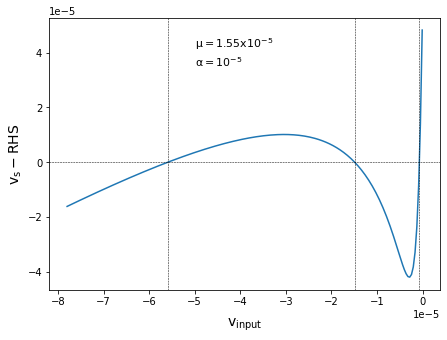

In [161]:
# plot generated from the above code.

plt.figure(figsize = (7, 5))
plt.plot(vval, vout)

plt.axhline(y = 0.0, color = "black", linestyle = 'o--', linewidth = 0.5)
plt.axvline(x = -5.587*10**-5, color = "black", linestyle = '--', linewidth = 0.5)
plt.axvline(x = -1.492*10**-5, color = "black", linestyle = '--', linewidth = 0.5)
plt.axvline(x = -7.300*10**-7, color = "black", linestyle = '--', linewidth = 0.5)

plt.text(-5e-5, 4.2e-5, r'$\mu = 1.55 x 10^{-5}$', fontsize = 11)
plt.text(-5e-5, 3.5e-5, r'$\alpha = 10^{-5}$', fontsize = 11)

plt.xlabel(r'$v_{input}$', fontsize = 14, labelpad = 10)
plt.ylabel(r'$v_{s} - RHS$', fontsize = 14)
#plt.savefig("bisection-verification.jpg", dpi = 1200)
plt.show()

In [15]:
def integral_equation(mu, v_input):
        
    def j(x, y):
        return x_integ(x) * y_integ(y)

    def y_integ(y):
        return beta * f(y) * np.exp(-beta * g(y) - ((-h / (3 * nu)) * (v_input + (3 * nu) / 2)) * y)

    def x_integ(x):
        return f(x) * np.exp(beta * g(x) + ((-h / (3 * nu)) * (v_input + (3 * nu) / 2)) * x)

    def j_integ(x):
        return x_integ(x) * integral_of_f(x)

    def integral_of_f(x):
        return quad(y_integ, 20, x)[0]  

                  
    beta = (mu**2) / (3 * nu * h**3)       
        
    v_output = (-2 * mu * mu_g * 0.248 / h**3) - (2 * mu * mu_g / h**3) * quad(j_integ, -20, 20)[0]  
        
    return v_output

0   -4.0989691445237246e-07
1   -3.9276185796207896e-07
2   -3.857203745829823e-07
3   -3.8287603478282516e-07
4   -3.817352802852176e-07
5   -3.8127909500203323e-07
6   -3.810968803628097e-07
7   -3.810241321544238e-07
8   -3.809950932489604e-07
9   -3.8098350265206323e-07
10   -3.809788765156525e-07
11   -3.8097703011515825e-07
12   -3.8097629317653015e-07
13   -3.809759990488396e-07
14   -3.8097588165638674e-07
15   -3.809758348026418e-07
16   -3.809758161023496e-07
17   -3.8097580863867925e-07
18   -3.809758056597753e-07


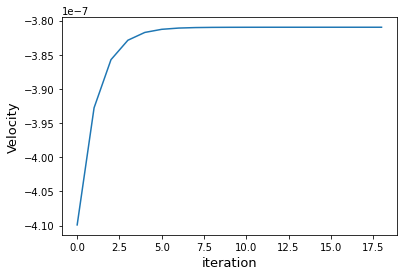

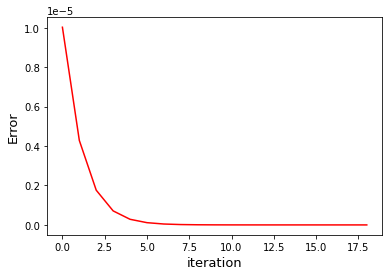


 v output: (-3.809758056597753e-07, 7.447259909851174e-13)

 time: 4.9292217572530115 min


In [40]:
ti = time.time()

sol = algo(-4.5e-7, 0.004, 1e-12)

te = time.time()
print('\n',"v output:",sol)
print('\n',"time:",(te-ti)/60,'min')

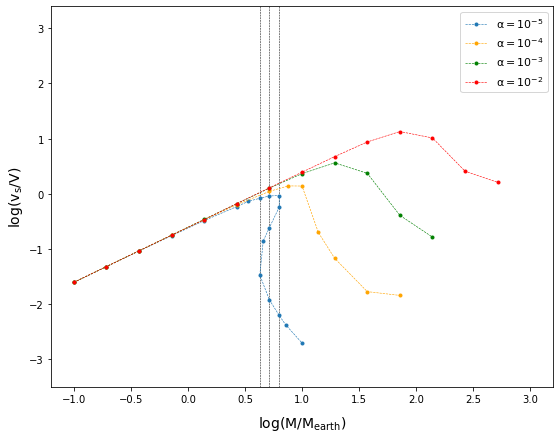

In [134]:
mu_values1 = [-1, -0.71428571, -0.42857143, -0.14285714, 0.14285714, 
              0.42857143, 0.53, 0.63, 0.714, 0.80, 0.80, 0.714, 0.66, 
              0.63, 0.714, 0.80, 0.855, 1]                             # values of mass for first plot in log scale 
                                                                                                   

mu_values2 = [-1, -0.71428571, -0.42857143, -0.14285714, 0.14285714, 
              0.42857143, 0.71428571, 0.88, 1, 1.1428, 1.28571429, 1.57142857, 1.85714286] #... ...for second plot in log scale  

mu_values3 = log_mass[0:12]
mu_values4 = log_mass[0:14]

V = -6.122 * 10**-5  # Normalization factor for velocity

v_values1 = np.array([-1.5183*10**-6, -2.924*10**-6, -5.61*10**-6, -1.064*10**-5, -2.00*10**-5, 
                      -3.589*10**-5, -4.476*10**-5, -5.0722*10**-5, -5.587*10**-5, 
                      -5.69*10**-5, -3.51*10**-5, -1.492*10**-5, -8.57*10**-6, -2.05*10**-6, -7.3*10**-7, 
                      -3.809*10**-7 ,-2.6*10**-7, -1.204*10**-7])/V


v_values2 = np.array([ -1.5183*10**-6, -2.93*10**-6, -5.65*10**-6, -1.089*10**-5, -2.08*10**-5, 
                      -3.88*10**-5, -6.77*10**-5, -8.512*10**-5, -8.456*10**-5, -1.217*10**-5,  
                      -4.14*10**-6, -1.03*10**-6, -8.79*10**-7])/V

v_values3 = np.array([ -1.51*10**-6, -2.93*10**-6, -5.66*10**-6, -1.092*10**-5, -2.108*10**-5, -4.06*10**-5, -7.75*10**-5,
                      -1.42*10**-4, -2.2264*10**-4, -1.4398*10**-4, -2.489*10**-5, -1.003*10**-5])/V

v_values4 = np.array([-1.518*10**-6, -2.93*10**-6, -5.65*10**-6, -1.089*10**-5, -2.08*10**-5, -4.07*10**-5, -7.86*10**-5,
                      -1.51*10**-4, -2.89*10**-4, -5.33*10**-4, -8.23*10**-4, -6.299*10**-4, -1.57*10**-4, -9.89*10**-5])/V


v_log1 = np.log10(v_values1)
v_log2 = np.log10(v_values2)
v_log3 = np.log10(v_values3)
v_log4 = np.log10(v_values4)

mpl.rcParams['mathtext.default'] = 'regular'
plt.figure(figsize = (9, 7))

plt.axvline(x = 0.714, color = "black", linestyle = '--', linewidth = 0.5)
plt.axvline(x = 0.630, color = "black", linestyle = '--', linewidth = 0.5)
plt.axvline(x = 0.800, color = "black", linestyle = '--', linewidth = 0.5)

plt.plot(mu_values1, v_log1, 'o--', lw = 0.6, label = r'$\alpha = 10^{-5}$', markersize = 3)
plt.plot(mu_values2, v_log2, 'o--', lw = 0.6, label = r'$\alpha = 10^{-4}$', markersize = 3, color = 'orange')
plt.plot(mu_values3, v_log3, 'o--', lw = 0.6, label = r'$\alpha = 10^{-3}$', markersize = 3, color = 'green')
plt.plot(mu_values4, v_log4, 'o--', lw = 0.6, label = r'$\alpha = 10^{-2}$', markersize = 3, color = 'red')
plt.xlabel(r'$log(M/M_{earth})$', fontsize = 14, labelpad = 10)
plt.ylabel(r'$log(v_{s}/V)$', fontsize = 14)
plt.legend(fontsize = 11)
plt.xlim(-1.2, 3.2)
plt.ylim(-3.5, 3.4)
#plt.savefig("eqn-34_plot2.jpg", dpi = 1200)
plt.show()

In [135]:
up = 3 * 10**-6
x = np.arange(-1, 3, 0.1)
u = up * 10**x                       
ug = 0.0035             
u_log_arr = np.array(u/up)     
u_log_arr2 = u_log_arr.astype(float)
u_log = np.log10(u_log_arr2)          # log scale for mass
V = -6.122 * 10**-5                   # Velocity normalization factor

In [136]:
def del_v0(alpha):
    
    uv = 0.0024*(alpha)**(1/2)
    return ((-2 * ug * uv**2) * (1 - np.exp(-0.248 * (u/uv)**2)))/(0.000343 * u)

del_v = np.vectorize(del_v0)

dv1 = del_v(10**(-5))
dv2 = del_v(10**(-4))
dv3 = del_v(10**(-3))
dv4 = del_v(10**(-2))

v_s_arr = np.array([dv1, dv2, dv3, dv4])

In [137]:
def velocity1(alpha, nu):
    u2 = 0.00371 * (alpha**(2/3))/0.63
    return (dv1/(1 + (u/u2)**3)) - ((3 * nu/2)/(1 + (u2/u)**3))

def velocity2(alpha, nu):
    u2 = 0.00371 * (alpha**(2/3))/0.63
    return (dv2/(1 + (u/u2)**3)) - ((3 * nu/2)/(1 + (u2/u)**3))

def velocity3(alpha, nu):
    u2 = 0.00371 * (alpha**(2/3))/0.63
    return (dv3/(1 + (u/u2)**3)) - ((3 * nu/2)/(1 + (u2/u)**3))

def velocity4(alpha, nu):
    u2 = 0.00371 * (alpha**(2/3))/0.63
    return (dv4/(1 + (u/u2)**3)) - ((3 * nu/2)/(1 + (u2/u)**3))

vec_velocity1 = np.vectorize(velocity1)
vec_velocity2 = np.vectorize(velocity2)
vec_velocity3 = np.vectorize(velocity3)
vec_velocity4 = np.vectorize(velocity4)

vel1 = vec_velocity1(10**(-5), 5.6 * 10**-8)
vel2 = vec_velocity2(10**(-4), 5.6 * 10**-7)
vel3 = vec_velocity3(10**(-3), 5.6 * 10**-6)
vel4 = vec_velocity4(10**(-2), 5.6 * 10**-5)

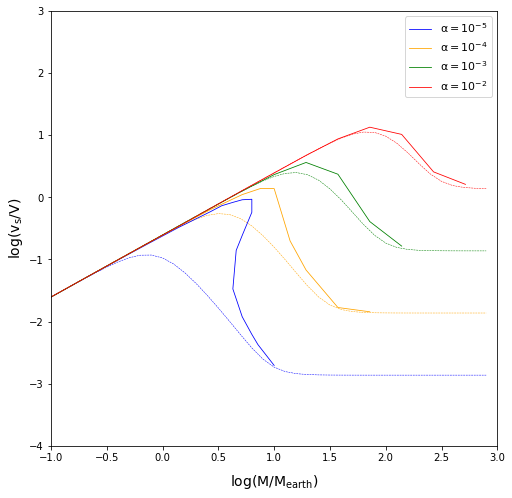

In [162]:
mp = 3*10**-6      
x = np.arange(-1, 3, 0.1)        
mu = mp * 10**x                      # mass - scale
mu_log_arr = np.array(mu/mp)     
mu_log_arr2 = mu_log_arr.astype(float)
mu_log = np.log10(mu_log_arr2)     

import matplotlib as mpl
mpl.rcParams['mathtext.default'] = 'regular'

plt.figure(figsize = (8, 8))
plt.plot(mu_log, np.log10(vel1/V), '--', lw = 0.5, markersize = 3, color = "blue")
plt.plot(mu_log, np.log10(vel2/V), '--', lw = 0.5, markersize = 3, color = "orange")
plt.plot(mu_log, np.log10(vel3/V), '--', lw = 0.5, markersize = 3, color = "green")
plt.plot(mu_log, np.log10(vel4/V), '--', lw = 0.5, markersize = 3, color = "red")
plt.plot(mu_values1, v_log1, lw = 0.8, label = r'$\alpha = 10^{-5}$', color = "blue")
plt.plot(mu_values2, v_log2, lw = 0.8, label = r'$\alpha = 10^{-4}$', color = "orange")
plt.plot(mu_values3, v_log3, lw = 0.8, label = r'$\alpha = 10^{-3}$', color = "green")
plt.plot(mu_values4, v_log4, lw = 0.8, label = r'$\alpha = 10^{-2}$', color = "red")
plt.xlabel(r'$log(M/M_{earth})$', fontsize = 13, labelpad = 10)
plt.ylabel(r'$log(v_{s}/V)$', fontsize = 13)
plt.legend(fontsize = 11)
plt.xlim(-1, 3)
plt.ylim(-4, 3)
#plt.savefig("num_soln.jpg", dpi = 1200)

plt.xlabel(r'$log(M/M_{earth})$', fontsize = 14)
plt.ylabel(r'$log(v_{s}/V)$', fontsize = 14)
plt.show()